In [141]:
from __future__ import division, unicode_literals, print_function
import os
from numpy import *
from pandas import DataFrame, Series
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import prettyplotlib as ppl
import seaborn as sns

In [16]:
import bokeh.plotting as bkh


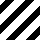
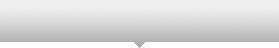
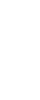
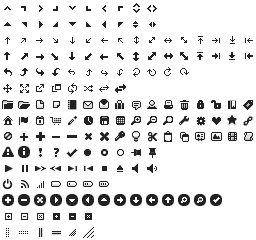
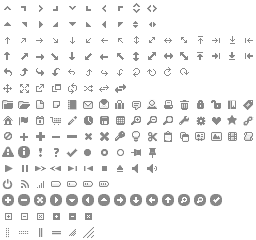
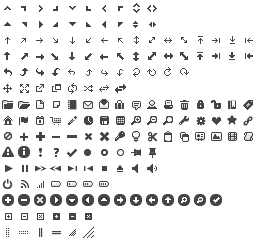
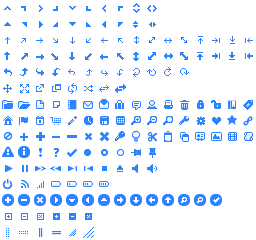
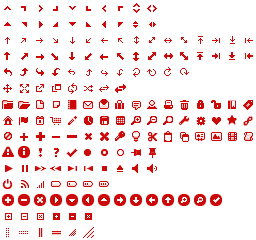
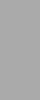
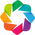
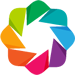
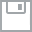
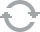
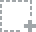
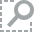
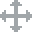
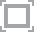
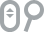

In [17]:
bkh.output_notebook()

In [2]:
sns.set_style('whitegrid')
# sns.set(style="ticks", palette="Set2")
sns.despine()

In [3]:
%matplotlib inline

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 150)

In [128]:
dir_imgs = u'/Users/mmngreco/Documents/repos/okun_with_mpa/imgs'
dir_data_work = u'/Users/mmngreco/Documents/repos/okun_with_mpa/data_work'

# TEORÍA

- [Ley de Okun](https://es.wikipedia.org/wiki/Ley_de_Okun)
- [Okun's Law](https://en.wikipedia.org/wiki/Okun%27s_law)
- [How useful is Okun's Law](https://www.kansascityfed.org/publicat/econrev/pdf/4q07knotek.pdf)
- [Interpreting Deviations from Okun’s Law](http://www.frbsf.org/economic-research/publications/economic-letter/2014/april/okun-law-deviation-unemployment-recession/)
- [Do Forecasters Believe in Okun’s Law? An Assessment of Unemployment and Output Forecasts](https://www.imf.org/external/pubs/ft/wp/2014/wp1424.pdf)


# REGRESIÓN

- statsmodels: [Regression](http://statsmodels.sourceforge.net/devel/regression.html) [Get Started](http://statsmodels.sourceforge.net/devel/gettingstarted.html)
- Linear Regression: [link](http://connor-johnson.com/2014/02/18/linear-regression-with-python/)

In [202]:
# importamos los datos:

os.chdir(dir_data_work)

dempleo = pd.read_excel('d_empleo.xls', encoding='utf-8')
dtparo = pd.read_excel('d_tasa_u.xls', encoding='utf-8')
dpib = pd.read_excel('d_y.xls', encoding='utf-8')

In [203]:
ccaa = dempleo.columns

In [204]:
dtparo.head(5)

,tiempo,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
0,1977,0.9500,1.9250,0.3950,0.7700,-0.0050,0.1950,0.4450,1.5200,0.5300,0.5150,0.8450,3.6600,0.3100,1.1700,-0.0650,-0.500,0.7200,0.3350
1,1978,1.7575,1.4450,2.1000,1.3400,0.2225,1.2675,0.9575,1.0400,1.5025,2.2925,1.1000,1.7825,0.6850,3.0475,0.9475,2.160,3.1450,1.1100
2,1979,1.6925,1.3275,1.6925,2.2325,0.4725,0.7400,1.0200,1.4500,1.6425,1.8675,1.8825,3.2200,0.8625,2.0875,1.9200,2.985,2.2650,1.5275
3,1980,2.7800,3.5650,2.1400,1.0675,3.1800,1.6975,1.9725,1.7250,2.9925,4.2400,3.0675,1.5025,1.6100,2.1575,1.8650,3.450,3.0200,1.0575
4,1981,2.6150,2.3850,3.1725,3.3450,1.9625,3.9050,2.8425,1.9225,3.2925,3.1625,3.6225,1.5200,1.1075,1.8175,2.7275,1.160,3.3375,2.2550


In [205]:
dempleo.tail(2)

,tiempo,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
37,2014,1.194058,2.438428,0.792991,1.867991,1.412103,1.249152,1.443017,0.387749,-0.017742,2.065190,1.671649,4.160871,-0.83142,-0.070260,2.963758,1.68552,-0.937460,2.992088
38,2015,2.966834,4.738076,4.566611,-0.746358,6.859730,4.957496,1.518142,1.809023,0.420586,1.631152,4.090791,1.747885,1.16700,5.082604,-1.555106,0.60807,0.741939,1.061407


In [206]:
dpib.head(2)

,tiempo,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
0,1981,-0.176386,-1.456997,-2.346228,1.121621,3.640682,0.942174,1.358970,-5.480896,-3.760777,-1.091455,2.764928,-3.071443,1.226780,0.694282,1.074916,3.254464,1.394926,4.012676
1,1982,1.566031,3.249267,5.106148,1.742998,3.193933,0.443868,1.935409,3.839401,0.792044,-1.022031,0.139252,0.634761,1.910504,3.101519,-0.529805,-1.212097,2.286644,4.007184


In [213]:
y1 = dempleo
x1 = dpib

y2 = dtparo
x2 = dpib

In [214]:
y1.reset_index(inplace=True,drop=True)
y2.reset_index(inplace=True,drop=True)
x1.reset_index(inplace=True,drop=True)
x2.reset_index(inplace=True,drop=True)

In [215]:
pd.DataFrame([y1.tiempo, 
              x1.tiempo, 
              y2.tiempo, 
              x2.tiempo]).T.diff(periods=1)

,tiempo,tiempo,tiempo,tiempo
0,NaN,NaN,NaN,NaN
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,1
8,1,1,1,1
9,1,1,1,1


In [118]:
variables = dempleo.columns

In [119]:
len(variables)

19

In [137]:
os.chdir(dir_imgs)

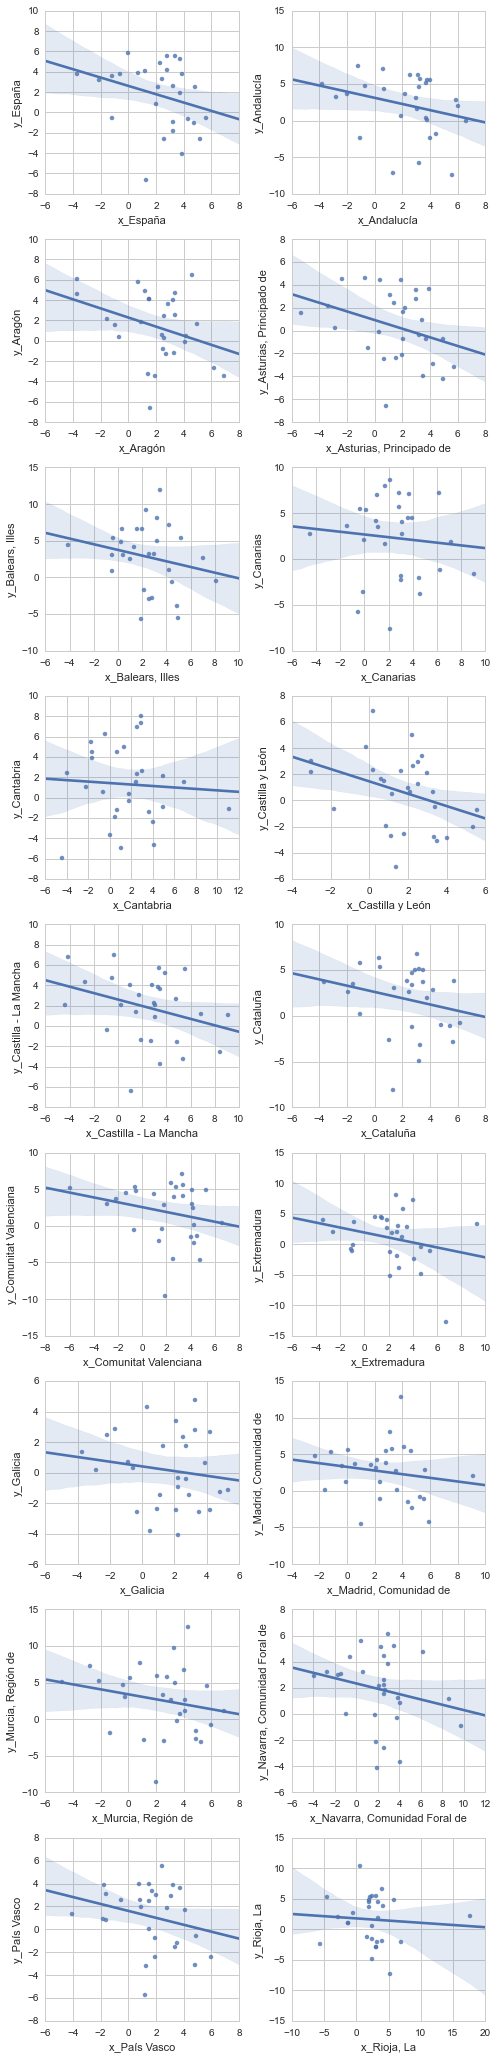

In [121]:
data = DataFrame()
fig = plt.figure(figsize=(7,60))


for i, v in enumerate(variables[1:]):
    ax = fig.add_subplot(len(variables),2,i+1)
    data = DataFrame()
    data['x_%s' % v] = x[v] 
    data['y_%s' % v] = y[v]
    data['tiempo'] = dpib.tiempo
    sns.regplot('x_%s' % v, 'y_%s' % v, data=data, ax=ax,)

plt.tight_layout()

In [122]:
y = dtparo.ix[4:,1:]
x = dpib.ix[:31,1:]

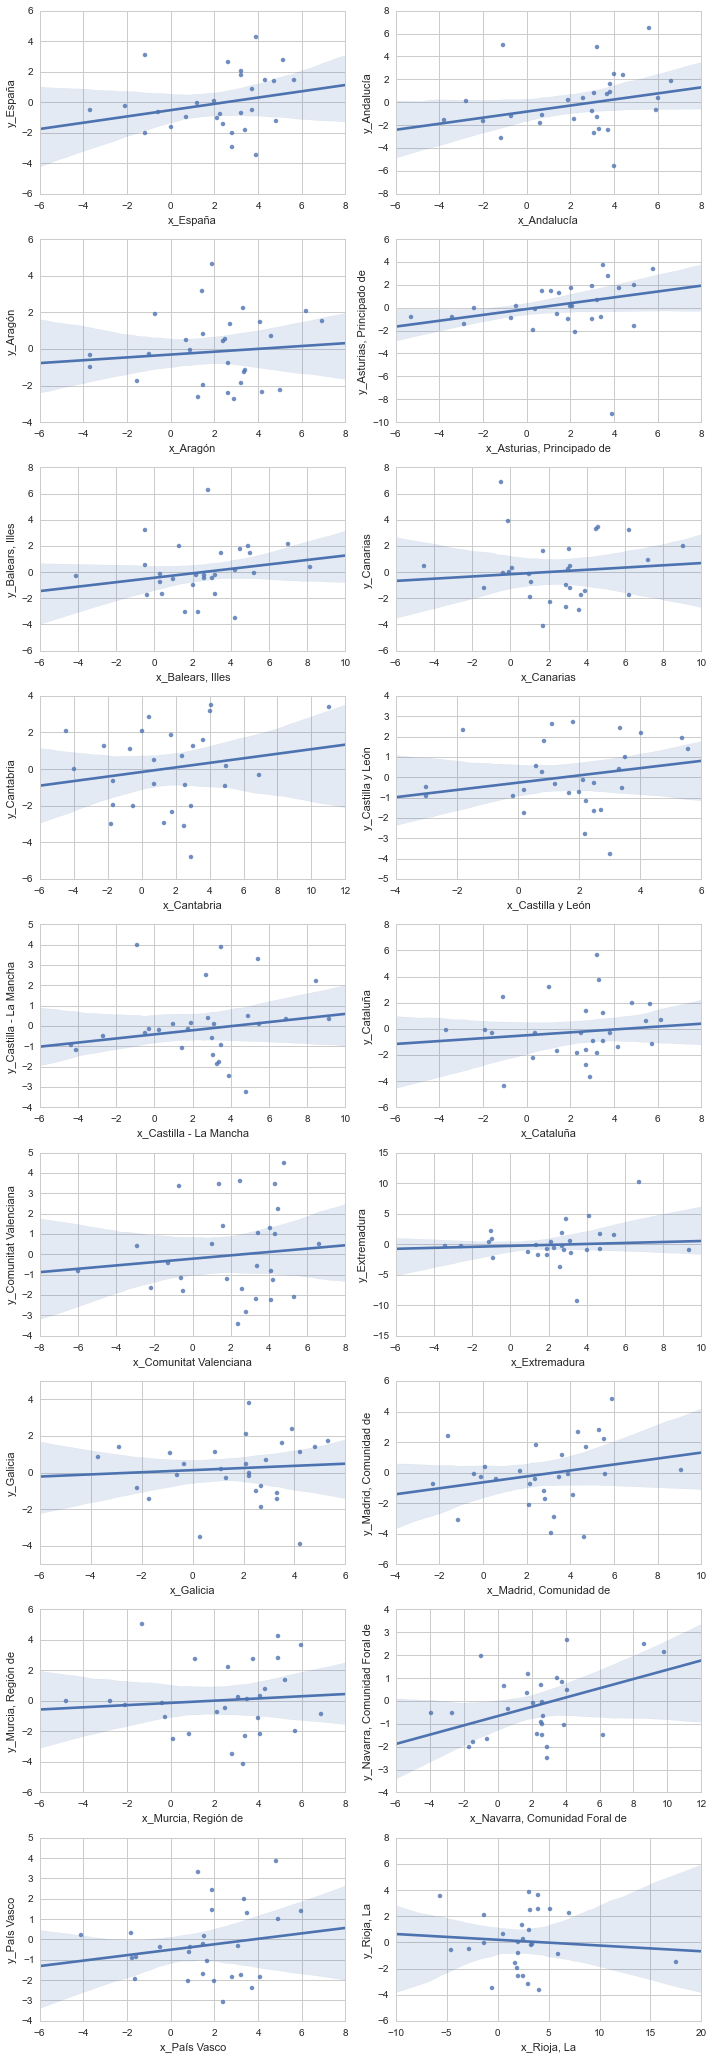

In [125]:
data = DataFrame()
fig = plt.figure(figsize=(10,60))


for i, v in enumerate(variables[1:]):
    ax = fig.add_subplot(len(variables),2,i+1)
    data = DataFrame()
    data['x_%s' % v] = x[v] 
    data['y_%s' % v] = y[v]
    data['tiempo'] = dpib.tiempo
    sns.regplot('x_%s' % v, 'y_%s' % v, data=data, ax=ax, fit_reg=True, robust=True)

plt.tight_layout()

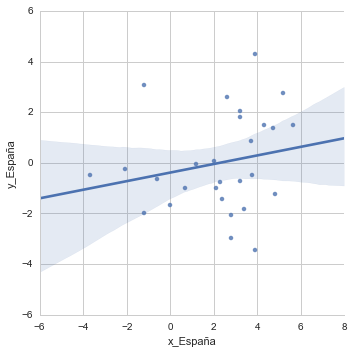

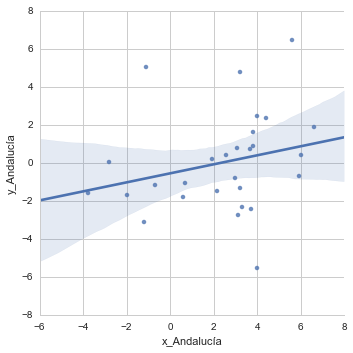

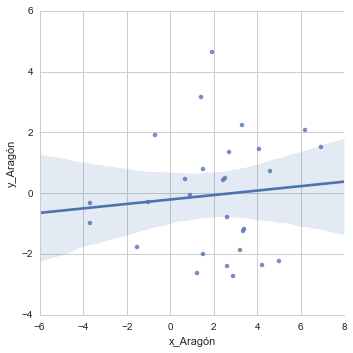

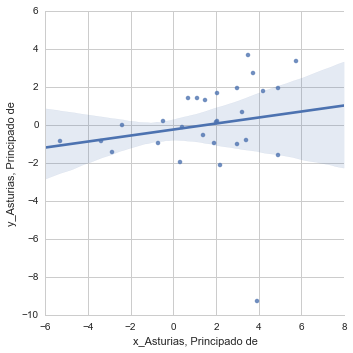

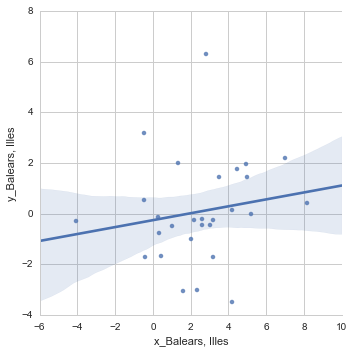

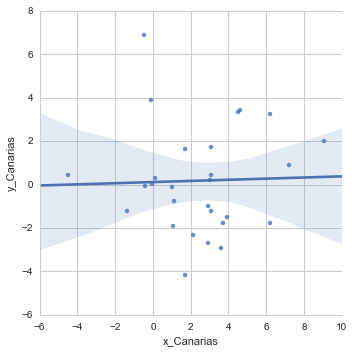

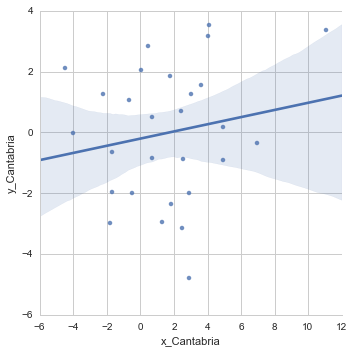

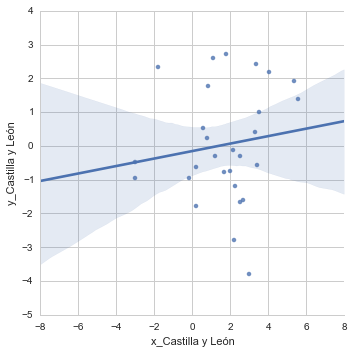

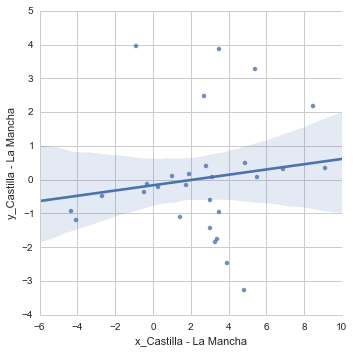

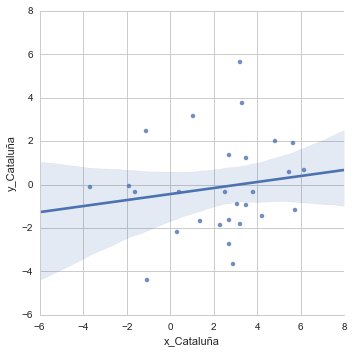

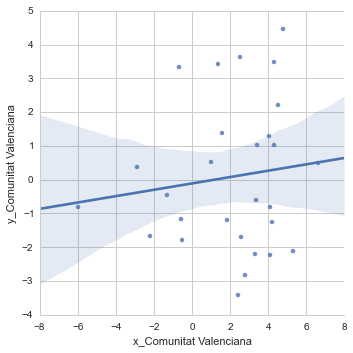

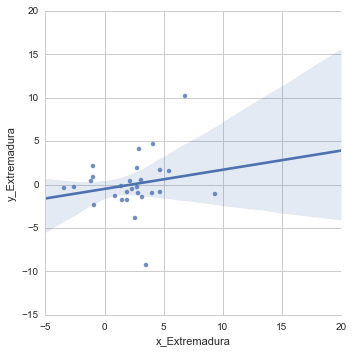

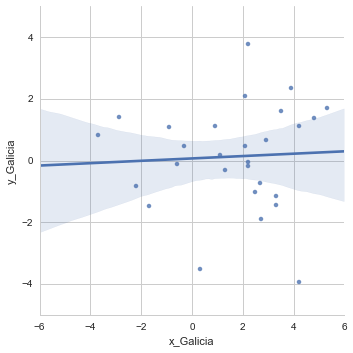

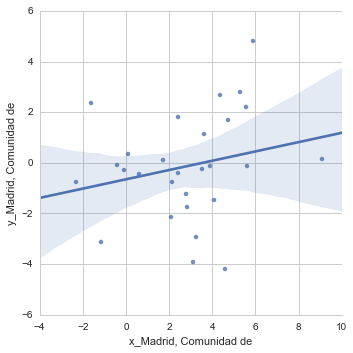

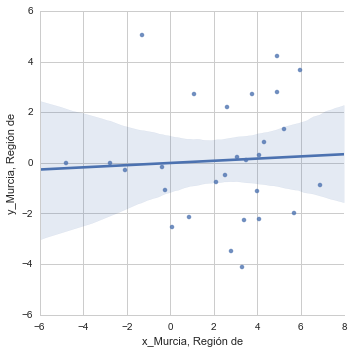

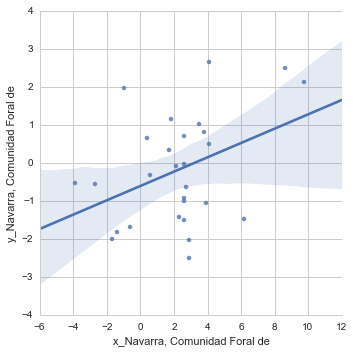

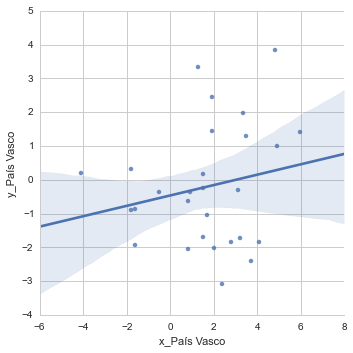

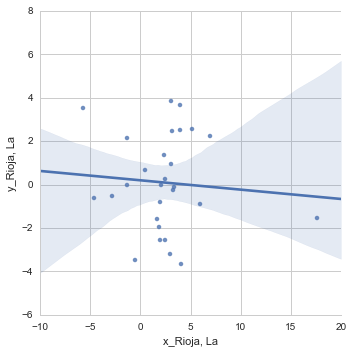

In [145]:
data = DataFrame()
#fig = plt.figure(figsize=(10,60))


for i, v in enumerate(variables[1:]):
#    ax = fig.add_subplot(len(variables),2,i+1)
    data = DataFrame()
    data['x_%s' % v] = x[v] 
    data['y_%s' % v] = y[v]
    data['tiempo'] = dpib.tiempo
    sns.lmplot('x_%s' % v, 'y_%s' % v, data=data, order=1)

plt.tight_layout()

In [153]:
x['const'] = x[v].copy(deep=True) / x[v]

In [165]:
x

,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",const
0,-0.176386,-1.456997,-2.346228,1.121621,3.640682,0.942174,1.358970,-5.480896,-3.760777,-1.091455,2.764928,-3.071443,1.226780,0.694282,1.074916,3.254464,1.394926,4.012676,1
1,1.566031,3.249267,5.106148,1.742998,3.193933,0.443868,1.935409,3.839401,0.792044,-1.022031,0.139252,0.634761,1.910504,3.101519,-0.529805,-1.212097,2.286644,4.007184,1
2,2.219515,2.073187,3.597423,1.427327,5.320039,4.001063,2.789751,4.083741,0.544179,1.852549,1.999187,2.962849,0.467647,3.530362,2.055012,2.117859,-0.456085,3.526563,1
3,1.467263,0.926750,4.523166,1.037119,5.651876,-3.298992,1.364932,2.346318,3.315778,2.111942,2.078348,15.412740,0.862779,1.086147,0.907437,-0.313084,-3.101469,2.367420,1
4,2.612154,4.401941,1.430620,5.762654,4.915213,-0.099144,0.460544,5.358574,5.413938,1.042192,2.508034,5.425663,0.895389,2.404848,1.115291,1.804612,1.269627,6.957249,1
5,3.200002,3.674649,2.416318,4.910449,4.466886,9.050469,-4.471688,0.856598,0.266987,3.290278,1.385674,-0.941236,-2.891546,9.087840,3.764355,1.713888,1.897635,-5.658895,1
6,5.641392,6.616699,4.072207,2.054489,7.004455,7.191861,4.944889,5.560190,9.126677,5.633801,6.633063,9.328962,3.883683,5.540790,5.244136,9.771539,1.905210,2.488832,1
7,5.161465,5.611941,6.908858,4.212683,4.202690,6.216173,11.030216,3.345872,8.471583,6.153501,4.496810,6.752322,5.321482,4.368518,3.076334,2.576238,3.362107,5.140783,1
8,4.737902,3.069510,6.194566,3.721350,2.162990,4.508306,6.930643,4.025633,6.875838,5.467204,4.041339,3.103966,4.811135,4.719946,5.951850,8.612393,5.949816,3.916598,1
9,3.740588,6.001691,3.359341,-0.497045,8.136845,-0.064185,0.037286,2.128319,3.046091,5.728918,4.226080,2.132824,-0.319860,2.837483,6.904575,2.691201,1.516376,17.542829,1


In [152]:
# Fit and summarize OLS model

mod = sm.OLS(y[v], x[['const',v]])
res = mod.fit()
print(res.summary())

ValueError: The indices for endog and exog are not aligned